In [112]:
#!/usr/bin/env python2
#RNN model to learn arithmetic behaviour.

# -*- coding: utf-8 -*-
"""
@author: arshad
"""
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randint, seed
import sys
import io

In [123]:
# This python program demonstrate how to teach arithmetic behaviour (Add, Subtract, Multiplication) into a single RNN model.

def GetNumber():
  return random.random()

# Generate training data in 3 groups (Addition, Subtraction, Multiplication)
# OpDataSize = number of samples for each group.
# Data boundary = 0 - 1
def GenerateData(OpDataSize):
    
    OpNums = 3

    Data=np.zeros((OpDataSize * OpNums,3,1))
    Target = np.zeros((OpDataSize * OpNums))

    ADD = 0.1; SUB = 0.2; MULT = 0.3

    OpNum = 1 # Add
    for index in range(OpDataSize * (OpNum - 1), OpDataSize * OpNum ):
        Data[index][0][0] = GetNumber()
        Data[index][1][0] = GetNumber()
        Data[index][2][0] = ADD
        Target[index] = Data[index][0][0] + Data[index][1][0]
      #  print (data1[x][0][0], data1[x][1][0], res[x])

    OpNum = 2 # Subtract
    for index in range(OpDataSize * (OpNum - 1), OpDataSize * OpNum ):
        Data[index][0][0] = GetNumber()
        Data[index][1][0] = GetNumber()
        Data[index][2][0] = SUB
        Target[index] = Data[index][0][0] - Data[index][1][0]

    OpNum = 3  # Multiplication
    for index in range(OpDataSize * (OpNum - 1), OpDataSize * OpNum):
        Data[index][0][0] = GetNumber()
        Data[index][1][0] = GetNumber()
        Data[index][2][0] = MULT
        Target[index] = Data[index][0][0] * Data[index][1][0]
    
    return Data, Target

Data, Target = GenerateData(400)

In [124]:
x_train,x_test,y_train,y_test = train_test_split(Data, Target, test_size=0.2, random_state=4)

In [125]:
model = Sequential()  
model.add(SimpleRNN((128), batch_input_shape=(None, 3,1),return_sequences=True))
model.add(SimpleRNN((64), return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['accuracy'])
model.summary()

#model.load_weights("saved_weights_lstm.hdf5")
#model.save_weights('saved_weights_lstm.hdf5', overwrite=True)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_15 (SimpleRNN)    (None, 3, 128)            16640     
_________________________________________________________________
simple_rnn_16 (SimpleRNN)    (None, 64)                12352     
_________________________________________________________________
dense_15 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 31,105
Trainable params: 31,105
Non-trainable params: 0
_________________________________________________________________


In [126]:
history = model.fit(x_train, y_train, epochs=500, batch_size=10, verbose=2,validation_data=(x_test, y_test))

Train on 960 samples, validate on 240 samples
Epoch 1/500
 - 2s - loss: 0.2484 - acc: 0.0000e+00 - val_loss: 0.2214 - val_acc: 0.0000e+00
Epoch 2/500
 - 1s - loss: 0.1955 - acc: 0.0000e+00 - val_loss: 0.1744 - val_acc: 0.0000e+00
Epoch 3/500
 - 1s - loss: 0.1759 - acc: 0.0000e+00 - val_loss: 0.1812 - val_acc: 0.0000e+00
Epoch 4/500
 - 0s - loss: 0.1749 - acc: 0.0000e+00 - val_loss: 0.1724 - val_acc: 0.0000e+00
Epoch 5/500
 - 0s - loss: 0.1688 - acc: 0.0000e+00 - val_loss: 0.1719 - val_acc: 0.0000e+00
Epoch 6/500
 - 1s - loss: 0.1753 - acc: 0.0000e+00 - val_loss: 0.2912 - val_acc: 0.0000e+00
Epoch 7/500
 - 0s - loss: 0.1763 - acc: 0.0000e+00 - val_loss: 0.1883 - val_acc: 0.0000e+00
Epoch 8/500
 - 1s - loss: 0.1593 - acc: 0.0000e+00 - val_loss: 0.1781 - val_acc: 0.0000e+00
Epoch 9/500
 - 0s - loss: 0.1591 - acc: 0.0000e+00 - val_loss: 0.1697 - val_acc: 0.0000e+00
Epoch 10/500
 - 1s - loss: 0.1609 - acc: 0.0000e+00 - val_loss: 0.1622 - val_acc: 0.0000e+00
Epoch 11/500
 - 1s - loss: 0.1776

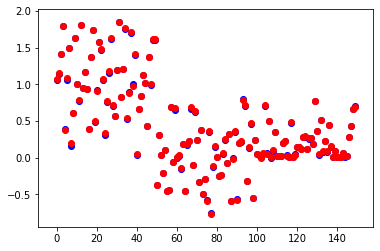

In [129]:
ValData, ValTarget = GenerateData(50)
predictions=model.predict(ValData)
plt.scatter(range(len(ValTarget)), ValTarget, c='b')
plt.scatter(range(len(predictions)), predictions, c='r') 